In [108]:
# Get Data to play with
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [109]:
def plot_ts(ts: pd.Series, title: str = None) -> None:
    """plots a given timeseries and displays an optional title"""

    plt.figure(figsize=(20, 5))
    ax = plt.subplot(111)
    plt.plot(ts)
    plt.title(title or '', loc='right', fontsize=15)
    plt.grid(alpha=0.5, linestyle='dashed')
    plt.show()

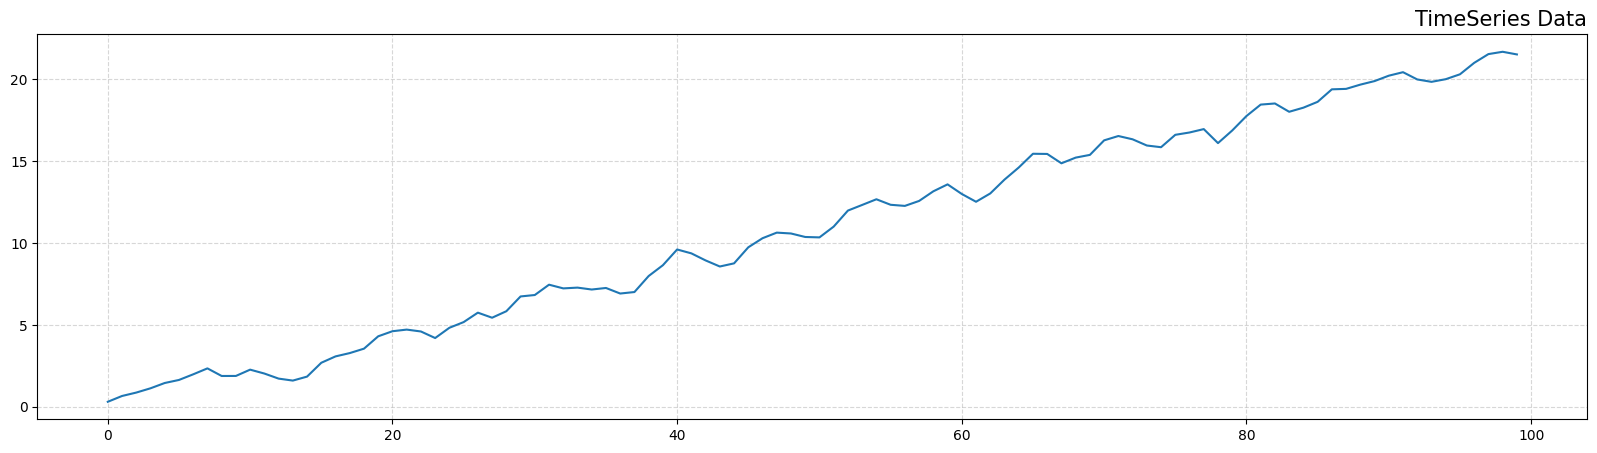

In [114]:
# Generate Random Time Series Data
np.random.seed(42)
n = 100
mean = 0
std = 1
trend = 0.22
window_size = 10

time_series = np.random.normal(mean, std, n)

time_axis = np.arange(n)
trend = trend * time_axis
time_series = time_series + trend

smoothed_time_series = savgol_filter(time_series, window_size, 5)
plot_ts(smoothed_time_series, title='TimeSeries Data')

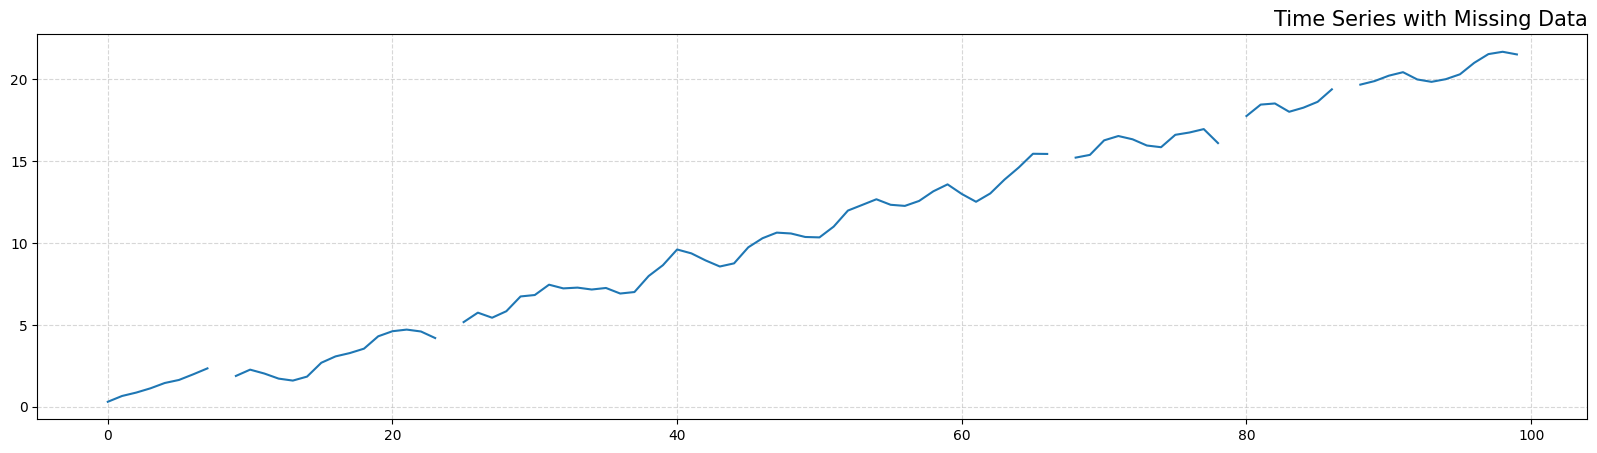

In [115]:
# Remove Random Values for interpolation
np.random.seed(100)
missing_time_series = pd.Series(smoothed_time_series)
missing_index = np.random.choice(missing_time_series.index, 5)
missing_time_series[missing_index] = np.nan

plot_ts(missing_time_series, title="Time Series with Missing Data")

In [ ]:
# Tools

def show_imputation(imputed: pd.Series,
                    title: str,
                    figsize: tuple = None,
                    ts_original: pd.Series = smoothed_time_series,
                    ts_missing: pd.Series = missing_time_series,
                    ) -> None:
    """plots the imputation and compares with original"""

    figsize = figsize or (20, 5)
    plt.figure(figsize=figsize)
    ax = plt.subplot(111)
    smoothed_time_series.plot(
        ax=ax,
        color='green',
        linestyle='dashed',
        label='original')
    imputed.plot(
        ax=ax,
        color='red',
        linestyle='dotted',
        label='imputed')
    missing_time_series.plot(
        ax=ax,
        color='blue',
        label='GDP')
    plt.title(title, loc='right', fontsize=15)
    plt.grid(alpha=0.5, linestyle='dashed')
    plt.legend()
    plt.show()

def get_rmse(imputed: pd.Series,
             smoothed_time_series: pd.Series = smoothed_time_series,
             missing_time_series: pd.Series = missing_time_series,
             ) -> None:
    """get RMSE for timeseries imputation"""

    mse = mean_squared_error(
        y_true=smoothed_time_series[missing_index],
        y_pred=imputed[missing_index]
    )
    rmse = np.sqrt(mse)
    return rmse

### Linear Interpolation

### Cubic Interpolation

### Polynomial Interpolation

### Volumetric Interpolation

### Mean Imputation Strategy

### Median Imputation Strategy

### Last Observation Carried Forward / Forward Fill 

### Next Observation Carried Forward / Backward Fill

### Spline Interpolation